# Reed Stuhlreyer

In [1]:
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris 

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

import mglearn

In [2]:
species = pd.read_csv("FinalExamDistributed.csv").values

In [3]:
labelencoder = LabelEncoder()
species[:,0] = labelencoder.fit_transform(species[:,0]) # setting string species names = 0,1,2,3

In [46]:
# core data and target values created and stored here
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))

#datatype=int
data = min_max_scaler.fit_transform(species[:,1:4].astype(int)) # Qualitys to scale
data = np.append(data, species[:,4:5].astype(int), axis=1) # this column already to scale
data = np.append(data, min_max_scaler.fit_transform(species[:,5:7].astype(int)), axis=1)

target = species[:,0].astype(int) # IDs

# datatype=float
fata = min_max_scaler.fit_transform(species[:,1:4]) # Qualitys to scale
fata = np.append(fata, min_max_scaler.fit_transform(species[:,4:5]), axis=1) # this column already to scale
fata = np.append(fata, min_max_scaler.fit_transform(species[:,5:7]), axis=1)

data

array([[ 0.1       , -1.        ,  0.33333333,  0.        , -0.85270758,
         0.        ],
       [ 0.3       , -0.33333333,  0.44444444,  0.        , -0.61981548,
         0.        ],
       [-0.2       , -1.        , -0.22222222,  0.        , -0.34247894,
         0.5       ],
       ...,
       [ 0.9       ,  0.33333333, -1.        ,  0.        , -0.21403931,
         0.        ],
       [-0.2       , -0.33333333, -1.        ,  0.        ,  0.72571199,
         0.        ],
       [-0.3       , -0.33333333, -0.66666667,  0.        ,  0.41091055,
         0.        ]])

In [47]:
# seperated tuples for plots below
d1 = data[:,0:1] # Sulpher
d3 = data[:,2:3] # EDR
d5 = data[:,4:5] # AP

d2 = data[:,1:2] # HEV
d4 = data[:,3:4] # CDP
d6 = data[:,5:6] # CN
d1[0], d3[0], d5[0],'', d2[0], d4[0],d6[0]

(array([0.1]),
 array([0.33333333]),
 array([-0.85270758]),
 '',
 array([-1.]),
 array([0.]),
 array([0.]))

In [48]:
plotData = np.append(d1, d3, axis=1)
plotData = np.append(plotData, d5, axis=1)
plotData1 = np.append(d2, d4, axis=1)
plotData1 = np.append(plotData1, d6, axis=1)

array([[<AxesSubplot:xlabel='0', ylabel='0'>,
        <AxesSubplot:xlabel='1', ylabel='0'>,
        <AxesSubplot:xlabel='2', ylabel='0'>],
       [<AxesSubplot:xlabel='0', ylabel='1'>,
        <AxesSubplot:xlabel='1', ylabel='1'>,
        <AxesSubplot:xlabel='2', ylabel='1'>],
       [<AxesSubplot:xlabel='0', ylabel='2'>,
        <AxesSubplot:xlabel='1', ylabel='2'>,
        <AxesSubplot:xlabel='2', ylabel='2'>]], dtype=object)

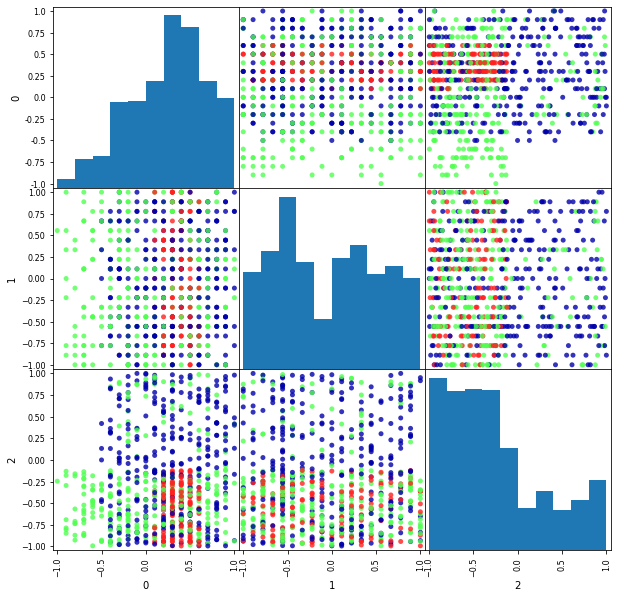

In [49]:
Xtrain, xtest, Ytrain, ytest = train_test_split(plotData, target, random_state=5522) 
frame = pd.DataFrame(Xtrain)
pd.plotting.scatter_matrix(frame, c=Ytrain, figsize=(10,10), marker='o', hist_kwds={'bins':10}, s=25, alpha=.8, cmap=mglearn.cm3)

/Users/reedstuhlreyer/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/reedstuhlreyer/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/reedstuhlreyer/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<AxesSubplot:xlabel='0', ylabel='0'>,
        <AxesSubplot:xlabel='1', ylabel='0'>,
        <AxesSubplot:xlabel='2', ylabel='0'>],
       [<AxesSubplot:xlabel='0', ylabel='1'>,
        <AxesSubplot:xlabel='1', ylabel='1'>,
        <AxesSubplot:xlabel='2', ylabel='1'>],
       [<AxesSubplot:xlabel='0', ylabel='2'>,
        <AxesSubplot:xlabel='1', ylabel='2'>,
        <AxesSubplot:xlabel='2', ylabel='2'>]], dtype=object)

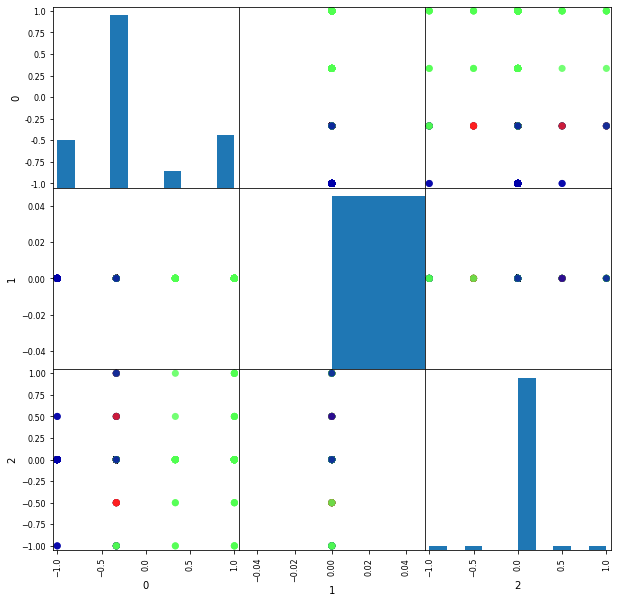

In [50]:
Xtrain, xtest, Ytrain, ytest = train_test_split(plotData1, target, random_state=5522) 
frame1 = pd.DataFrame(Xtrain)
pd.plotting.scatter_matrix(frame1, c=Ytrain, figsize=(10,10), marker='o', hist_kwds={'bins':10}, s=50, alpha=.8, cmap=mglearn.cm3)

In [51]:
Xtrain, xtest, Ytrain, ytest = train_test_split(data, target, random_state=5522) 
species_frame = pd.DataFrame(Xtrain)
#pd.plotting.scatter_matrix(species_frame, c=Ytrain, figsize=(15,15), marker='x', hist_kwds={'bins':10}, s=10, alpha=.8, cmap=mglearn.cm3)

In [52]:
data, target

(array([[ 0.1       , -1.        ,  0.33333333,  0.        , -0.85270758,
          0.        ],
        [ 0.3       , -0.33333333,  0.44444444,  0.        , -0.61981548,
          0.        ],
        [-0.2       , -1.        , -0.22222222,  0.        , -0.34247894,
          0.5       ],
        ...,
        [ 0.9       ,  0.33333333, -1.        ,  0.        , -0.21403931,
          0.        ],
        [-0.2       , -0.33333333, -1.        ,  0.        ,  0.72571199,
          0.        ],
        [-0.3       , -0.33333333, -0.66666667,  0.        ,  0.41091055,
          0.        ]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0

# Nearest Neighbor

In [92]:
Xtrain, xtest, Ytrain, ytest = train_test_split(data, target, test_size=0.25, random_state=5522)
Btrain, btest, Ctrain, ctest = train_test_split(fata, target, test_size=0.25, random_state=5522) 
Xtrain

array([[-0.1       , -0.33333333,  1.        ,  0.        , -0.83706378,
         0.        ],
       [ 0.7       ,  1.        ,  0.22222222,  0.        , -0.27340554,
         0.        ],
       [ 0.8       , -0.33333333,  0.77777778,  0.        ,  0.6104292 ,
         0.        ],
       ...,
       [-0.2       , -0.33333333, -0.77777778,  0.        ,  0.29691135,
         0.        ],
       [ 0.2       ,  0.33333333, -0.22222222,  0.        , -0.55579623,
         0.        ],
       [ 0.1       , -0.33333333, -0.44444444,  0.        , -0.14400321,
         0.        ]])

In [96]:
knn = KNeighborsClassifier(n_neighbors=7)
knnb = KNeighborsClassifier(n_neighbors=7)

In [97]:
knn.fit(Xtrain, Ytrain), knnb.fit(Btrain, Ctrain)

(KNeighborsClassifier(n_neighbors=7), KNeighborsClassifier(n_neighbors=7))

In [98]:
knn.score(xtest, ytest), knnb.score(btest, ctest)

(0.836, 0.912)

#### Without changing the input data as type int I can maximize nearest neighbor classifier: 84%, if we feed the classifier float data the score increases to 91.2%

# _________

In [104]:

data3 =  fata[:,0:5] # removing last quality 
data3

array([[ 0.11262302, -0.89598706,  0.34488047,  0.8670027 , -0.85270758],
       [ 0.29502308, -0.82588742,  0.40391981,  0.42714426, -0.61981548],
       [-0.23369297, -0.96715196, -0.14401909,  0.8684705 , -0.34247894],
       ...,
       [ 0.85652059,  0.16278954, -0.97140663, -0.4612737 , -0.21403931],
       [-0.20663217,  0.0212154 , -0.93078397, -0.90089441,  0.72571199],
       [-0.26102979, -0.16480248, -0.67346461, -0.15137774,  0.41091055]])

In [115]:
Xtrain, xtest, Ytrain, ytest = train_test_split(data3, target, test_size=0.25, random_state=5522) 

In [116]:
knn3 = KNeighborsClassifier(n_neighbors=8)

In [117]:
knn3.fit(Xtrain, Ytrain)

KNeighborsClassifier(n_neighbors=8)

In [118]:
knn3.score(xtest, ytest)

0.924

#### Removing chromosome number and changing test size to .27 gives a better output than the original: 84%, if we use float data we can get up to almost 93%

# _____________

In [119]:
# visually im getting the Os --- OOXOOX
data4 = fata[:,0:2]
data41 = fata[:,3:5] # 3:5 and 4:5 have very similar outputs

In [120]:
#data4, data41, data

In [121]:
data42 = np.append(data4, data41, axis=1) # merging my two sets of wanted information
data42 

array([[ 0.11262302, -0.89598706,  0.8670027 , -0.85270758],
       [ 0.29502308, -0.82588742,  0.42714426, -0.61981548],
       [-0.23369297, -0.96715196,  0.8684705 , -0.34247894],
       ...,
       [ 0.85652059,  0.16278954, -0.4612737 , -0.21403931],
       [-0.20663217,  0.0212154 , -0.90089441,  0.72571199],
       [-0.26102979, -0.16480248, -0.15137774,  0.41091055]])

In [122]:
Xtrain, xtest, Ytrain, ytest = train_test_split(data42, target, test_size=0.27, random_state=5522) 

In [123]:
knn4 = KNeighborsClassifier(n_neighbors=9)

In [124]:
knn4.fit(Xtrain, Ytrain)

KNeighborsClassifier(n_neighbors=9)

In [125]:
knn4.score(xtest, ytest) # testing on SC, HEV, CDP, and AP

0.9407407407407408

#### Making good strides here! 87.5% as int, but 94.1% with float data

# _____________________________

# Nueral Network

In [126]:
# first run on full dataset
Xtrain, xtest, Ytrain, ytest = train_test_split(data, target, test_size=0.25, random_state=5522) 
Xtrain

array([[-0.1       , -0.33333333,  1.        ,  0.        , -0.83706378,
         0.        ],
       [ 0.7       ,  1.        ,  0.22222222,  0.        , -0.27340554,
         0.        ],
       [ 0.8       , -0.33333333,  0.77777778,  0.        ,  0.6104292 ,
         0.        ],
       ...,
       [-0.2       , -0.33333333, -0.77777778,  0.        ,  0.29691135,
         0.        ],
       [ 0.2       ,  0.33333333, -0.22222222,  0.        , -0.55579623,
         0.        ],
       [ 0.1       , -0.33333333, -0.44444444,  0.        , -0.14400321,
         0.        ]])

In [127]:
Ytrain = to_categorical(Ytrain)
Ytrain.shape

(750, 4)

In [128]:
def buildAndTrainModel(numEpochs) :
    global model, Xtrain, Ytrain, xtest, ytest
    # Build the NN model - inputs, neurons in hidden layer, neurons in output layer
    model = Sequential()
    model.add(Dense(6, input_dim=6))
    model.add(Activation('sigmoid')) # sigmoid tanh softmax relu
    model.add(Activation('tanh'))
    model.add(Dense(4))
    
    sgd = SGD(lr=0.1)
    
    model.compile(loss='mean_squared_error', optimizer=sgd,metrics = ["accuracy"])
    
    model.fit(Xtrain, Ytrain, batch_size=1, epochs=numEpochs)

In [129]:
buildAndTrainModel(100)

Epoch 1/100


2022-05-07 11:35:06.874733: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/reedstuhlreyer/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


750/750 [==============================] - 1s 867us/step - loss: 0.1519 - accuracy: 0.5587
Epoch 2/100
750/750 [==============================] - 1s 760us/step - loss: 0.1261 - accuracy: 0.6373
Epoch 3/100
750/750 [==============================] - 1s 756us/step - loss: 0.1244 - accuracy: 0.6333
Epoch 4/100
750/750 [==============================] - 1s 807us/step - loss: 0.1218 - accuracy: 0.6240
Epoch 5/100
750/750 [==============================] - 1s 749us/step - loss: 0.1186 - accuracy: 0.6440
Epoch 6/100
750/750 [==============================] - 1s 752us/step - loss: 0.1175 - accuracy: 0.6573
Epoch 7/100
750/750 [==============================] - 1s 721us/step - loss: 0.1156 - accuracy: 0.6387
Epoch 8/100
750/750 [==============================] - 1s 809us/step - loss: 0.1148 - accuracy: 0.6707
Epoch 9/100
750/750 [==============================] - 1s 928us/step - loss: 0.1116 - accuracy: 0.6587
Epoch 10/100
750/750 [==============================] - 1s 800us/step - loss: 0.1091 

750/750 [==============================] - 1s 753us/step - loss: 0.0872 - accuracy: 0.7707
Epoch 81/100
750/750 [==============================] - 1s 719us/step - loss: 0.0867 - accuracy: 0.7693
Epoch 82/100
750/750 [==============================] - 1s 701us/step - loss: 0.0865 - accuracy: 0.7707
Epoch 83/100
750/750 [==============================] - 1s 709us/step - loss: 0.0863 - accuracy: 0.7693
Epoch 84/100
750/750 [==============================] - 1s 749us/step - loss: 0.0858 - accuracy: 0.7627
Epoch 85/100
750/750 [==============================] - 1s 948us/step - loss: 0.0860 - accuracy: 0.7693
Epoch 86/100
750/750 [==============================] - 1s 843us/step - loss: 0.0859 - accuracy: 0.7787
Epoch 87/100
750/750 [==============================] - 1s 759us/step - loss: 0.0859 - accuracy: 0.7693
Epoch 88/100
750/750 [==============================] - 1s 722us/step - loss: 0.0858 - accuracy: 0.7707
Epoch 89/100
750/750 [==============================] - 1s 725us/step - loss:

In [130]:
def posOfMaxOfFour(n1, n2, n3, n4) :
    if (n1 >= n2 and n1 >= n3 and n1 >= n4) :
        return 0
    if (n2 >= n1 and n2 >= n3 and n2 >= n4) :
        return 1
    if (n3 >= n1 and n3 >= n2 and n3 >= n4) :
        return 2
    if (n4 >= n1 and n4 >= n2 and n4 >= n3) :
        return 3

In [131]:
def predictResults () :
    sum=0
    for i in range(len(xtest)) :
        results = model.predict(np.array([xtest[i]]))
        result = posOfMaxOfFour(results[0][0], results[0][1], results[0][2], results[0][3])
        if (result == posOfMaxOfFour(ytest[i][0], ytest[i][1], ytest[i][2], ytest[i][3])):
            sum += 1
    print("Accuracy:",(sum/len(ytest)) * 100)

In [132]:
# reformat the target test data
ytest = to_categorical(ytest)
predictResults()

Accuracy: 79.60000000000001


#### Accuracy score without mutating the dataset: ~75%
### ______________________

In [133]:
Xtrain, xtest, Ytrain, ytest = train_test_split(data42, target, test_size=0.25, random_state=5522) 
Ytrain = to_categorical(Ytrain)

Xtrain, Ytrain.shape

(array([[-0.06242839, -0.67293753,  0.57111806, -0.83706378],
        [ 0.70596583,  0.80183723,  0.98571979, -0.27340554],
        [ 0.76209186, -0.58679275,  0.25964368,  0.6104292 ],
        ...,
        [-0.22603218, -0.20886185, -0.85367592,  0.29691135],
        [ 0.16894168,  0.09810739,  0.86833863, -0.55579623],
        [ 0.04543844, -0.78371997,  0.94927922, -0.14400321]]),
 (750, 4))

In [134]:
def buildAndTrain(numEpochs) :
    global model, Xtrain, Ytrain, xtest, ytest
    # Build the NN model - inputs, neurons in hidden layer, neurons in output layer
    model = Sequential()
    model.add(Dense(6, input_dim=4))
    model.add(Activation('tanh')) # sigmoid tanh softmax relu
    model.add(Activation('sigmoid'))
    model.add(Dense(8))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('tanh'))
    model.add(Dense(4))
    
    sgd = SGD(lr=0.1)
    
    model.compile(loss='mean_squared_error', optimizer=sgd,metrics = ["accuracy"])
    
    model.fit(Xtrain, Ytrain, batch_size=1, epochs=numEpochs)

In [135]:
buildAndTrain(100)

Epoch 1/100
750/750 [==============================] - 1s 846us/step - loss: 0.1383 - accuracy: 0.5960
Epoch 2/100
750/750 [==============================] - 1s 796us/step - loss: 0.1133 - accuracy: 0.6787
Epoch 3/100
750/750 [==============================] - 1s 785us/step - loss: 0.1053 - accuracy: 0.7253
Epoch 4/100
750/750 [==============================] - 1s 803us/step - loss: 0.0990 - accuracy: 0.7347
Epoch 5/100
750/750 [==============================] - 1s 924us/step - loss: 0.0930 - accuracy: 0.7493
Epoch 6/100
750/750 [==============================] - 1s 840us/step - loss: 0.0928 - accuracy: 0.7413
Epoch 7/100
750/750 [==============================] - 1s 841us/step - loss: 0.0900 - accuracy: 0.7480
Epoch 8/100
750/750 [==============================] - 1s 823us/step - loss: 0.0841 - accuracy: 0.7813
Epoch 9/100
750/750 [==============================] - 1s 826us/step - loss: 0.0803 - accuracy: 0.7813
Epoch 10/100
750/750 [==============================] - 1s 821us/step - l

750/750 [==============================] - 1s 841us/step - loss: 0.0436 - accuracy: 0.8813
Epoch 80/100
750/750 [==============================] - 1s 910us/step - loss: 0.0445 - accuracy: 0.8693
Epoch 81/100
750/750 [==============================] - 1s 849us/step - loss: 0.0431 - accuracy: 0.8693
Epoch 82/100
750/750 [==============================] - 1s 801us/step - loss: 0.0445 - accuracy: 0.8773
Epoch 83/100
750/750 [==============================] - 1s 858us/step - loss: 0.0439 - accuracy: 0.8720
Epoch 84/100
750/750 [==============================] - 1s 862us/step - loss: 0.0436 - accuracy: 0.8787
Epoch 85/100
750/750 [==============================] - 1s 824us/step - loss: 0.0423 - accuracy: 0.8840
Epoch 86/100
750/750 [==============================] - 1s 899us/step - loss: 0.0424 - accuracy: 0.8840
Epoch 87/100
750/750 [==============================] - 1s 887us/step - loss: 0.0429 - accuracy: 0.8840
Epoch 88/100
750/750 [==============================] - 1s 841us/step - loss:

In [136]:
ytest = to_categorical(ytest)
predictResults()

Accuracy: 87.6


### This data is not working with the nueral network classifier as much as the others
##### Once again I  see better scores when useing scaled data as type float, but i cannot get this into the 90s with nn

# Random Forest

In [137]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_moons
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import matplotlib.pyplot as plt
import mglearn

In [168]:
Xtrain, xtest, Ytrain, ytest = train_test_split(fata, target, random_state=9898)
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=4)
decision_tree = decision_tree.fit(data, target)
r = export_text(decision_tree, feature_names=['sulpher','hev','edr','cdp','ap','cn'])
X=fata # float data 
y=target # int categories 0-3

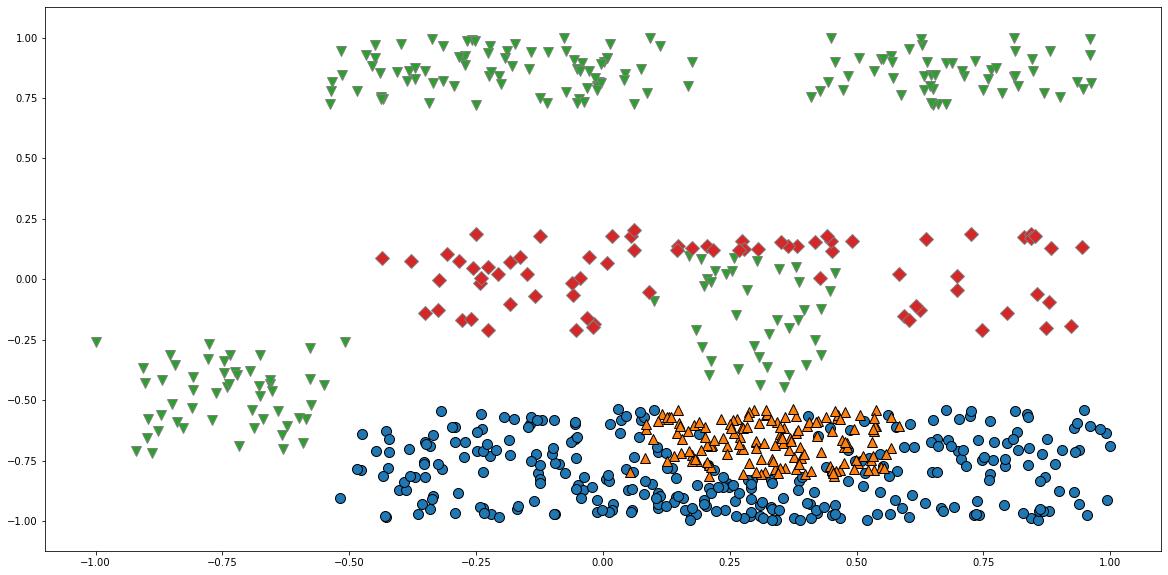

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)

fig, axes = plt.subplots(1, 1, figsize=(20, 10))
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [195]:
forest = RandomForestClassifier(n_estimators=20, random_state=6)
forest.fit(X_train, y_train)

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=1)
decision_tree = decision_tree.fit(X_train, y_train)
r = export_text(decision_tree, feature_names = ['sulpher','hev','edr','cdp','ap','cn'])
print(r)

|--- hev <= -0.54
|   |--- class: 0
|--- hev >  -0.54
|   |--- class: 2



In [196]:
decision_tree.score(X_train, y_train), decision_tree.score(X_test, y_test)

(0.6733333333333333, 0.672)

In [197]:
forest.score(X_train, y_train), forest.score(X_test, y_test)

(1.0, 0.944)

### The moons and forest functions work so much better with the float data once again
###### The forest performs at almost 100% accuracy with a depth of 3 trees and 15 estimators 
###### with 20 estimators the forest has 100% accuracy